# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

#não ta aparecendo as tabelas que traduzem os números da tabela de barcos

In [ ]:
#Passo a passo de um projeto de ciência de dados

#Passo 01 - entendimento do desafio
    #Prever o preço de um barco baseado nas características dele: ano, material...

In [ ]:
#Passo 02 - entendimento da área/empresa
    #No passo 01

In [1]:
#Passo 03 - Extração/obtenção de dados
import pandas as pd

tabela=pd.read_csv ('barcos_ref.csv')
display(tabela)

#para previsões com IA -> só se usa números, elas não aprendem com texto


,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [2]:
#Passo 04 - Ajuste de Dados (tratamento/limpeza)
#analisar as infos da tabela
print(tabela.info)

#nesse caso os dados estão certinhos, para tratamento ver aula projeto 02

<bound method DataFrame.info of       Preco  TipoBarco  TipoVenda   Ano  Comprimento  Largura  Material
0      3490          1          1  2020         4.00     1.50         1
1      3399          2          1  2019         3.55     1.46         2
2      3600          3          2  1999         6.20     2.38         2
3      3500          2          2  1987         4.35     1.75         3
4      3500          4          2  2004         4.70     2.00         3
...     ...        ...        ...   ...          ...      ...       ...
7644   5000          7          2  1974         7.20     2.70         3
7645   4999          4          2  1980         6.00     2.10         3
7646   4950          2          2  1984         6.00     1.62         5
7647   4499          4          1  2020         4.40     1.80         3
7648   3780          2          1  2019         3.60     1.60         3

[7649 rows x 7 columns]>


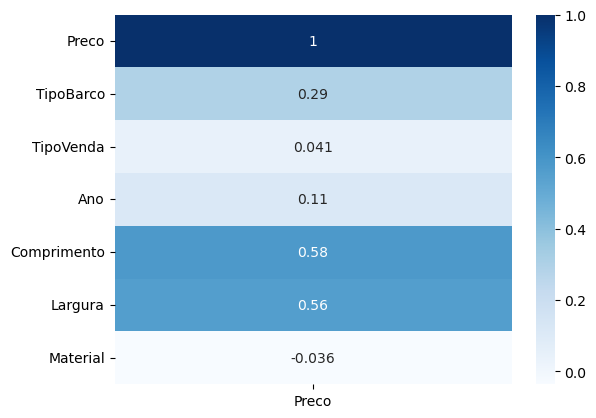

In [11]:
#Passo 05 - Análise exploratória
#entendendo a correlação entre as informações da base de dados

#display(tabela.corr()) # ou 
correlacao = tabela.corr()[['Preco']] #pra sair a correlação só com preço e em tabela bonitinha

#mostrando a tabela de correlação em gráfico - seaborn ou matplotlib.pyploy

import seaborn as sns
import matplotlib.pyplot as plt

#criamos com o seaborn e mostramos no matplotlib

#cria o gráfico
sns.heatmap(correlacao, cmap='Blues',annot=True)

#exibe o gráfico
plt.show()


In [12]:
#Passo 06 - Modelagem + Algorítmos (aqui entra IA, se necessário)

#dividir a base de dados pelas características (x) e o que ele quer prever (y)

y = tabela ['Preco']
x = tabela.drop('Preco', axis=1) #axis=1 pra falar que é a coluna

#train test split - dividir a base de dados entre treino e teste pra ver se a IA fez certo
from sklearn.model_selection import train_test_split

#sklearn é uma biblioteca muito importante para IA

x_treino, x_teste, y_treino, y_teste = train_test_split (x,y) #pode add test and train_size

#se você passa todos os testes pra treino -> overfitting -> IA só decora valores, não aprende a fazer o cálculo


In [14]:
#Importar a IA
#RegressãoLinear e ArvoreDeDecisao

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Criar a IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#Treinar a IA -> treinar 2 para comparar as previsões com a verdade e escolher o melhor
modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino,y_treino)

RandomForestRegressor()

0.41560453686239063
0.903078835534387


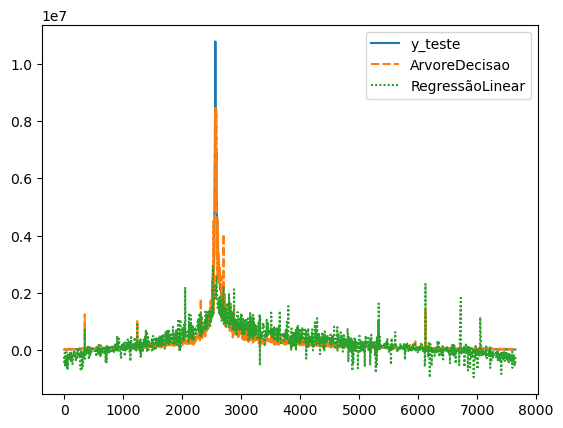

In [19]:
#Passo 07 - Interpretação de Resultados

#escolher o melhor modelo (que chega mais perto do valor real) -> R² (um percentual)
from sklearn.metrics import r2_score

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict (x_teste)

print (r2_score(y_teste, previsao_regressaolinear))
print (r2_score(y_teste, previsao_arvoredecisao))

#o que saiu no display foi a % de acertos de cada IA 

#visualizar as previsoes
tabela_auxiliar = pd.DataFrame ()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['ArvoreDecisao'] = previsao_arvoredecisao
tabela_auxiliar['RegressãoLinear'] =previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show()

In [17]:
#fazer novas previsoes (IA na pratica)
tabela_nova = pd.read_csv ('novos_barcos.csv')
display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 6341.56183333  9636.76       17996.        ]
